# CNN Model Pytorch
( Deep Learning )

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar datos
data_path = './train.csv'
mnist_data = pd.read_csv(data_path)
X = mnist_data.drop(labels=['label'], axis=1).values / 255.0
y = mnist_data['label'].values
X = X.reshape(-1, 1, 28, 28)

# Dividir datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

mnist_data_val = pd.read_csv('./test.csv')
X_test = mnist_data_val.values / 255.0
X_test = X_test.reshape(-1, 1, 28, 28)
X_test = torch.tensor(X_test, dtype=torch.float32)



# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

# Crear cargadores de datos
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)



In [11]:
# Definir la CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 2 * 2, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

# Crear el modelo
model = CNN()

# Definir el optimizador y la función de pérdida
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


## Training y Accuracy

In [12]:

# Entrenamiento
for epoch in range(10):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    # Validación
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            val_loss += criterion(y_pred, y_batch).item()
            _, predicted = torch.max(y_pred, 1)
            correct += (predicted == y_batch).sum().item()

    val_loss /= len(val_loader)
    val_acc = correct / len(y_val)
    print(f'Epoch {epoch}: Val Loss: {val_loss}, Val Accuracy: {val_acc}')


Epoch 0: Val Loss: 0.07441253284659152, Val Accuracy: 0.9761904761904762
Epoch 1: Val Loss: 0.057828770001475335, Val Accuracy: 0.9807142857142858
Epoch 2: Val Loss: 0.04331481213386834, Val Accuracy: 0.9855952380952381
Epoch 3: Val Loss: 0.04105190095574609, Val Accuracy: 0.9876190476190476
Epoch 4: Val Loss: 0.04410084203824006, Val Accuracy: 0.9866666666666667
Epoch 5: Val Loss: 0.02801080870840727, Val Accuracy: 0.991904761904762
Epoch 6: Val Loss: 0.04425528574122864, Val Accuracy: 0.9859523809523809
Epoch 7: Val Loss: 0.027346718309149077, Val Accuracy: 0.9910714285714286
Epoch 8: Val Loss: 0.042970284160687836, Val Accuracy: 0.988452380952381
Epoch 9: Val Loss: 0.035144674368452936, Val Accuracy: 0.9892857142857143


In [13]:
# Cargando los datos de prueba
test_data_path = './test.csv'
test_data = pd.read_csv(test_data_path)

# Mostrando las primeras filas para entender la estructura
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Predicciones: [8 7 4 3 0]


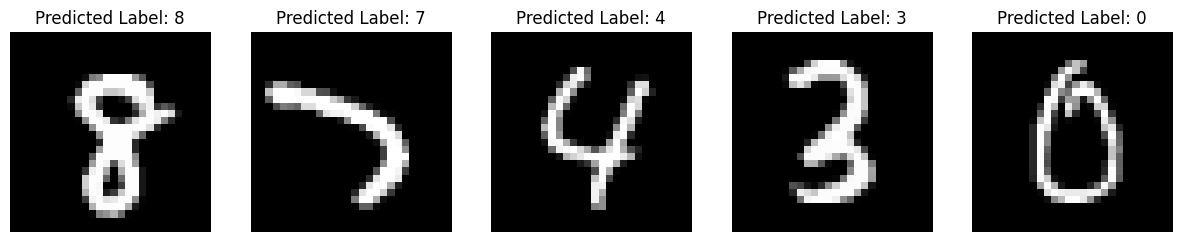

array([22680,  2275, 21833, 26898, 16895])

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionando 5 índices aleatorios
random_indices = np.random.choice(test_data.shape[0], 5, replace=False)

# Creando una figura para visualizar las imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))


# Seleccionando las imágenes correspondientes a los índices aleatorios
selected_images = test_data.iloc[random_indices].values.reshape(-1, 1, 28, 28)

# Convirtiendo a tensores de PyTorch
selected_images_tensor = torch.tensor(selected_images, dtype=torch.float32)

# Prediciendo los dígitos usando el modelo
model.eval()
with torch.no_grad():
    predictions = model(selected_images_tensor)
    predicted_labels = torch.argmax(predictions, 1)

# Imprimiendo las predicciones
print("Predicciones:", predicted_labels.numpy())

# Visualizando las imágenes seleccionadas
for i, idx in enumerate(random_indices):
    image_pixels = test_data.iloc[idx].values.reshape(28, 28)
    axes[i].imshow(image_pixels, cmap='gray')
    axes[i].set_title(f'Predicted Label: {predicted_labels[i]}')
    axes[i].axis('off')

plt.show()

# Retornando los índices seleccionados para su uso posterior
random_indices


# Scikit-Learn Model
( Red Neuronal Simple )

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Separando las etiquetas y los píxeles
X = mnist_data.drop(labels=['label'], axis=1).values
y = mnist_data['label'].values

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train_sk, X_val_sk, y_train_sk, y_val_sk = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train_sk = scaler.fit_transform(X_train_sk)
X_val_sk = scaler.transform(X_val_sk)


# Aplanando las imágenes para que sean compatibles con MLPClassifier
X_train_flat = X_train.reshape(-1, 28 * 28)
X_val_flat = X_val.reshape(-1, 28 * 28)




## Accuracy: 

In [17]:

# Creando la red neuronal
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10, random_state=42)

# Entrenando la red neuronal
mlp_model.fit(X_train_flat, y_train)

# Prediciendo las etiquetas en el conjunto de validación
y_val_pred = mlp_model.predict(X_val_flat)

# Calculando la precisión en el conjunto de validación
accuracy = accuracy_score(y_val, y_val_pred)
accuracy


c:\Users\angel\Proyectos\VIII\DATA\LAB3\lab3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9704761904761905

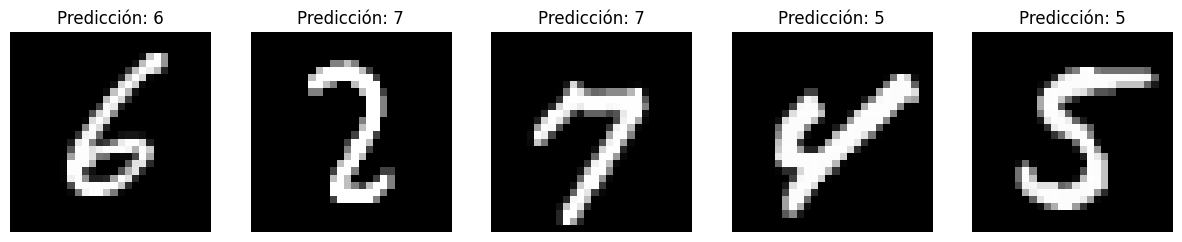

array([6, 7, 7, 5, 5], dtype=int64)

In [19]:
# Preparando las imágenes seleccionadas
selected_images_sk = test_data.iloc[random_indices].values
selected_images_sk_scaled = scaler.transform(selected_images_sk)  # Aplicando la misma normalización

# Prediciendo los dígitos usando el modelo
predictions_sk = mlp_model.predict(selected_images_sk_scaled)

# Creando una figura para visualizar las imágenes y predicciones
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Visualizando las imágenes seleccionadas y las predicciones correspondientes
for i, idx in enumerate(random_indices):
    image_pixels = selected_images_sk[i].reshape(28, 28)
    axes[i].imshow(image_pixels, cmap='gray')
    axes[i].set_title(f"Predicción: {predictions_sk[i]}")
    axes[i].axis('off')

plt.show()

# Imprimiendo las predicciones
predictions_sk


# KNN Model
( Modelo Extra )

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Creando el modelo KNN con k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenando el modelo KNN
knn_model.fit(X_train_sk, y_train_sk)

# Prediciendo las etiquetas en el conjunto de validación
y_val_pred_knn = knn_model.predict(X_val_sk)




## Accuracy:

In [24]:
# Calculando la precisión en el conjunto de validación
accuracy_knn = accuracy_score(y_val_sk, y_val_pred_knn)
accuracy_knn

0.9391666666666667

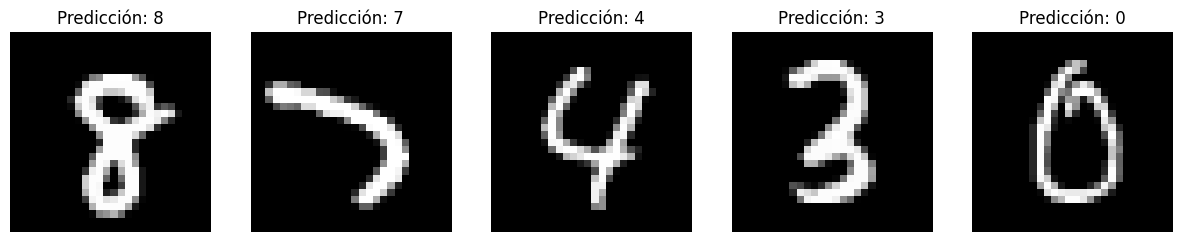

Predicciones: [8 7 4 3 0]


In [25]:
# Preparando las imágenes seleccionadas
selected_images_knn = test_data.iloc[random_indices].values
selected_images_knn_scaled = scaler.transform(selected_images_knn)  # Aplicando la misma normalización

# Prediciendo los dígitos usando el modelo KNN
predictions_knn = knn_model.predict(selected_images_knn_scaled)

# Creando una figura para visualizar las imágenes y predicciones
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Visualizando las imágenes seleccionadas y las predicciones correspondientes
for i, idx in enumerate(random_indices):
    image_pixels = selected_images_knn[i].reshape(28, 28)
    axes[i].imshow(image_pixels, cmap='gray')
    axes[i].set_title(f"Predicción: {predictions_knn[i]}")
    axes[i].axis('off')

plt.show()

# Imprimiendo las predicciones
print("Predicciones:", predictions_knn)


# Comparacion Modelos
## Matrices de Confusion

### CNN Model

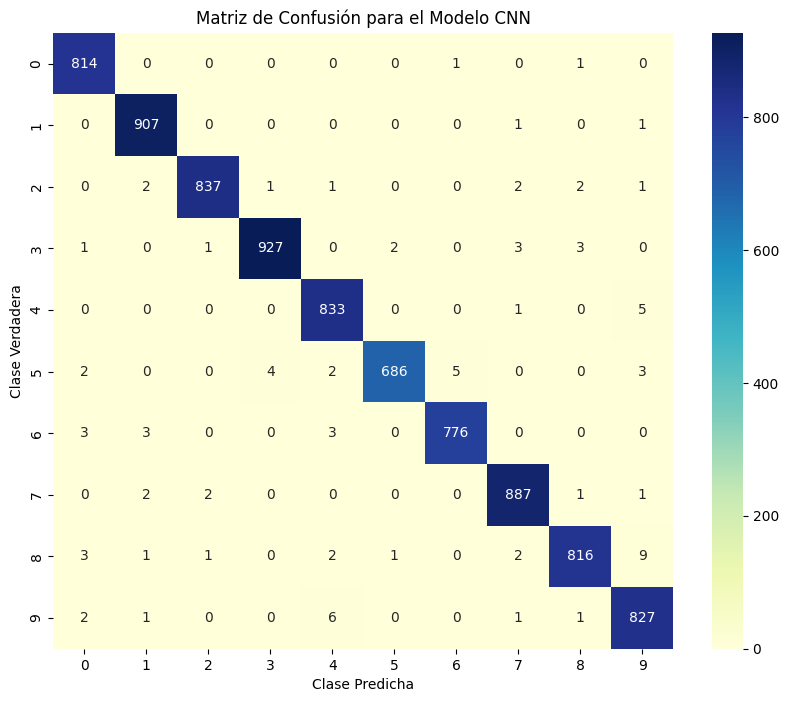

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Recolectando las predicciones y etiquetas verdaderas
y_val_true = []
y_val_pred_cnn = []

# Validación
model.eval()
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        y_pred = model(X_batch)
        _, predicted = torch.max(y_pred, 1)
        y_val_true.extend(y_batch.numpy())
        y_val_pred_cnn.extend(predicted.numpy())

# Calculando la matriz de confusión
confusion_matrix_cnn = confusion_matrix(y_val_true, y_val_pred_cnn)

# Visualizando la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_cnn, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Matriz de Confusión para el Modelo CNN")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")
plt.show()



### Simple NN

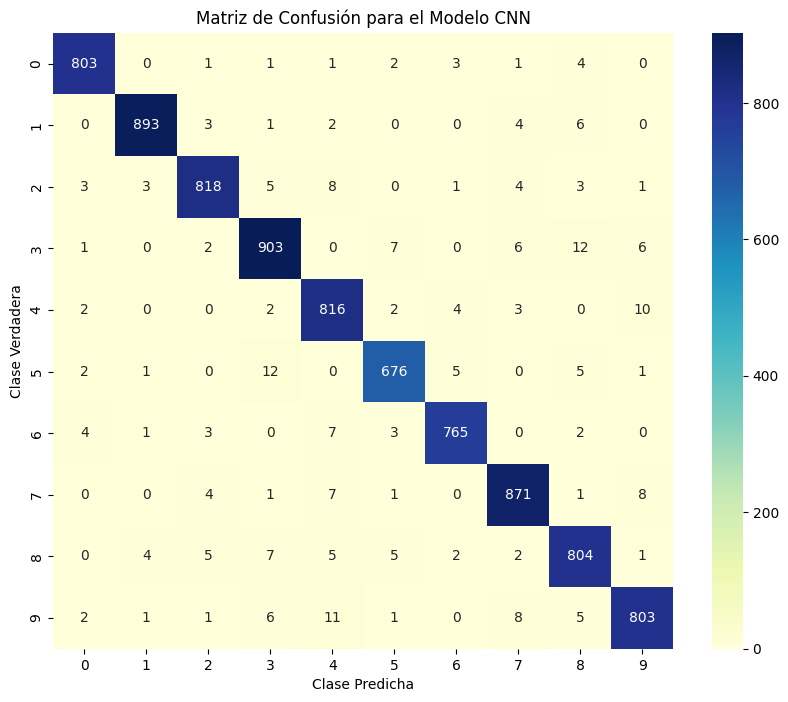

In [29]:
# Calculando la matriz de confusión
confusion_matrix_sckit = confusion_matrix(y_val, y_val_pred)

# Visualizando la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_sckit, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Matriz de Confusión para el Modelo CNN")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")
plt.show()


### KNN Model

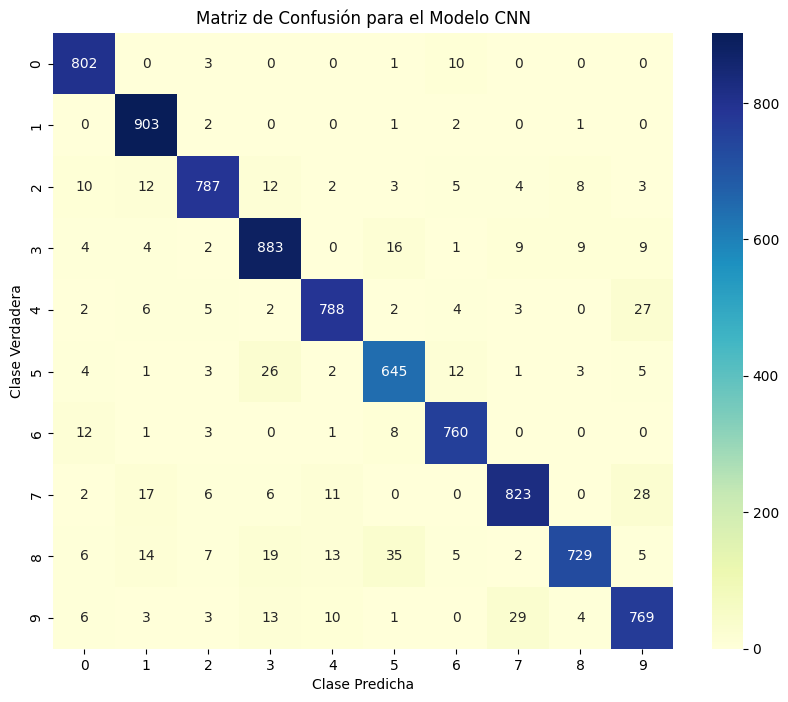

In [30]:
# Calculando la matriz de confusión
confusion_matrix_sckit = confusion_matrix(y_val, y_val_pred_knn)

# Visualizando la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_sckit, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Matriz de Confusión para el Modelo CNN")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")
plt.show()
